In [2]:
df<-read.csv('d:/data/ozone/ozone4.csv')
head(df)

Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
41,190,190.0000,7.4,67,5,1,41.00000,0
36,118,118.0000,8.0,72,5,2,36.00000,0
12,149,149.0000,12.6,74,5,3,12.00000,0
18,313,313.0000,11.5,62,5,4,18.00000,0
NA,NA,185.9315,14.3,56,5,5,42.12931,0
28,NA,185.9315,14.9,66,5,6,28.00000,0


In [3]:
library(dplyr)
#분석에 사용하지 않을 필드 제거
df<-df %>% select(-Ozone,-Solar.R,-Month,-Day,-Ozone2)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 153   4

Solar.R2,Wind,Temp,Result
190.0000,7.4,67,0
118.0000,8.0,72,0
149.0000,12.6,74,0
313.0000,11.5,62,0
185.9315,14.3,56,0
185.9315,14.9,66,0



  0   1 
109  44 

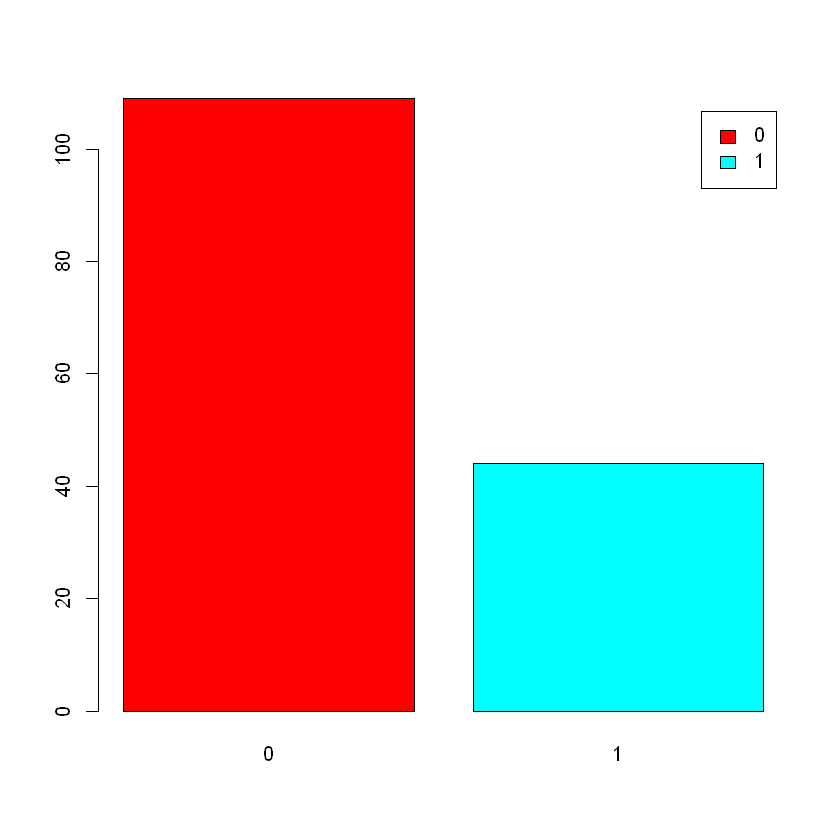

In [6]:
(tbl<-table(df$Result))
barplot(tbl,beside=T,legend=T,col=rainbow(2)) #카운트 플롯

In [8]:
library(ROSE)
df_samp<-ovun.sample(Result ~. , data=df, seed=1, method='under',
                     N=44*2)$data
(tbl<-table(df_samp$Result))


 0  1 
44 44 

In [9]:
library(caret)
set.seed(123)
#학습용:검증용 8:2로 구분
idx_train<-createDataPartition(y=df_samp$Result, p=0.8,list=F)
train <- df_samp[idx_train,]
X_train <- train[,-4]
y_train <- train[,4]
test<- df_samp[-idx_train,]
X_test<-test[,-4]
y_test<-test[,4]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


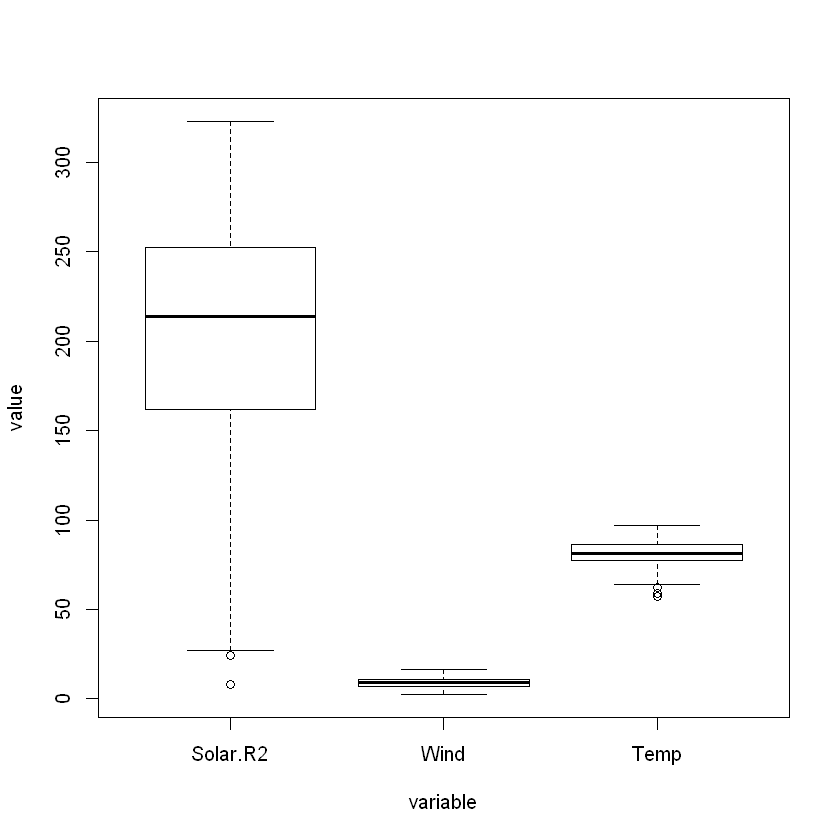

In [17]:
#스케일링 전의 박스플롯
library(reshape)
meltData<-melt(X_train)
boxplot(data=meltData,value~variable)

In [18]:
#scale() 함수로 정규화 후 다시 데이터 프레임으로 변환
X_train_scaled<-as.data.frame(scale(X_train))
X_test_scaled<-as.data.frame(scale(X_test))
#X변수에 y변수를 붙여서 만든 데이터 프레임
train_scaled<-cbind(X_train_scaled,Result=y_train)
test_scaled<-cbind(X_test_scaled,Result=y_test)

Using  as id variables


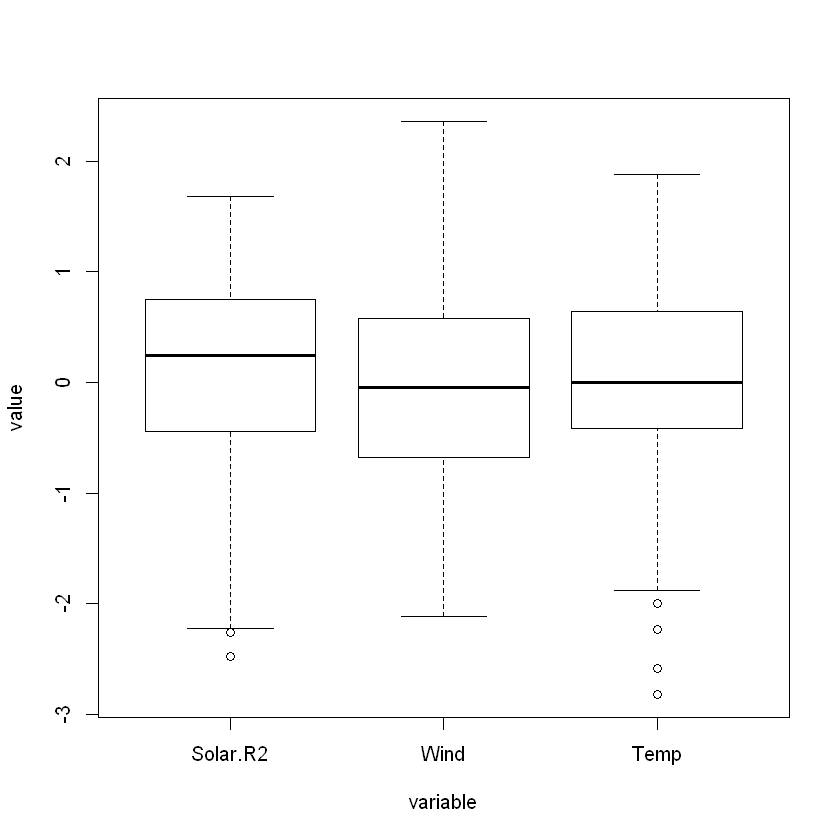

In [19]:
#스케일링 후 의 박스플롯
meltData<-melt(X_train_scaled)
boxplot(data=meltData,value~variable)

In [10]:
#install.packages('e1071')

Installing package into 'C:/Users/tjoeun302-18/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tjoeun302-18\AppData\Local\Temp\RtmpiWHGCj\downloaded_packages


In [20]:
library(e1071)
set.seed(123)
# svm:모형을 만들고 최적의 파라미터를 찾기 위한 과정
# cost: 값이 커지면 자세하게 결정 경계를 찾아냄
#값이 작아지면 이상치를 고려하여 일반적인 결정경계를 만들어냄
# gamma : 값이 커지면 각각의 데이터 포인트가 영향력을 행사하는 거리가
# 짧아지고 작아지면 영향력을 행사하는 거리가 길어짐
tune.out<-tune(svm,Result ~ . , data=train_scaled,
              range=list(cost=c(0.001,0.01,0.1,1,10),
                        gamma=c(0.0001,0.001,0.01,0.1)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.1542039 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-03 1e-04 0.5870660 0.07544269
2  1e-02 1e-04 0.5869078 0.07545081
3  1e-01 1e-04 0.5853280 0.07553184
4  1e+00 1e-04 0.5697182 0.07632944
5  1e+01 1e-04 0.4311357 0.08043937
6  1e-03 1e-03 0.5869096 0.07545038
7  1e-02 1e-03 0.5853460 0.07552748
8  1e-01 1e-03 0.5698944 0.07628658
9  1e+00 1e-03 0.4324998 0.08016633
10 1e+01 1e-03 0.1654579 0.06256274
11 1e-03 1e-02 0.5855127 0.07548912
12 1e-02 1e-02 0.5715253 0.07590889
13 1e-01 1e-02 0.4453811 0.07765264
14 1e+00 1e-02 0.1626118 0.06416091
15 1e+01 1e-02 0.1664284 0.07351348
16 1e-03 1e-01 0.5800318 0.07492764
17 1e-02 1e-01 0.5191664 0.07033929
18 1e-01 1e-01 0.1693963 0.05056926
19 1e+00 1e-01 0.1542039 0.08373611
20 1e+01 1e-01 0.1545189 0.08267717


In [21]:
#실험을 통해 만들어진 최적의 svm 모형
bestmodel<-tune.out$best.model
summary(bestmodel)


Call:
best.tune(method = svm, train.x = Result ~ ., data = train_scaled, 
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 10), gamma = c(1e-04, 
        0.001, 0.01, 0.1)))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  59






In [22]:
#학습용 데이터셋의 예측 정확도
pred<-predict(bestmodel,X_train_scaled)
result<-round(pred)
table(y_train,result)
mean(y_train==result)

       result
y_train  0  1
      0 30  6
      1  6 30

[1] 0.8333333

In [23]:
#검증용 데이터셋의 예측 정확도
pred<-predict(bestmodel,X_test_scaled)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test 0 1
     0 6 2
     1 3 5

[1] 0.6875